CAI DAT CAC THU VIEN

In [104]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


CAI DAT CAC THU VIEN CAN THIET

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,11)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [106]:


dataset = pd.read_csv("strokeDataset.csv")
data = dataset.copy()
data = data[data['gender'] != 'Other']
mean_bmi = data['bmi'].mean()
data['bmi'] = data['bmi'].fillna(mean_bmi)
data = data.drop("id", axis=1)

XỬ LÝ DỮ LIỆU

In [107]:
categorical = ['gender' ,'ever_married','work_type','Residence_type','smoking_status']
numerical = ['age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi']

In [108]:
print('work_type : ', data['work_type'].unique())
print('gender : ', data['gender'].unique())
print('Residence_type : ', data['Residence_type'].unique())
print('ever"_married : ', data['ever_married'].unique())
print('smoking_status : ', data['smoking_status'].unique())

work_type :  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
gender :  ['Male' 'Female']
Residence_type :  ['Urban' 'Rural']
ever"_married :  ['Yes' 'No']
smoking_status :  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [109]:
le=LabelEncoder()
smoking_status = le.fit_transform(data['smoking_status'])
gender = le.fit_transform(data['gender'])
ever_married = le.fit_transform(data['ever_married'])
Residence_type = le.fit_transform(data['Residence_type'])
work_type = le.fit_transform(data['work_type'])

In [110]:
data['work_type'] = work_type
data['gender'] = gender
data['Residence_type'] = Residence_type
data['ever_married'] = ever_married
data['smoking_status'] = smoking_status

In [111]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.60000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.89456,2,1
2,1,80.0,0,1,1,2,0,105.92,32.50000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.40000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.00000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.89456,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.00000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.60000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.60000,1,0


In [112]:
data.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3978
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

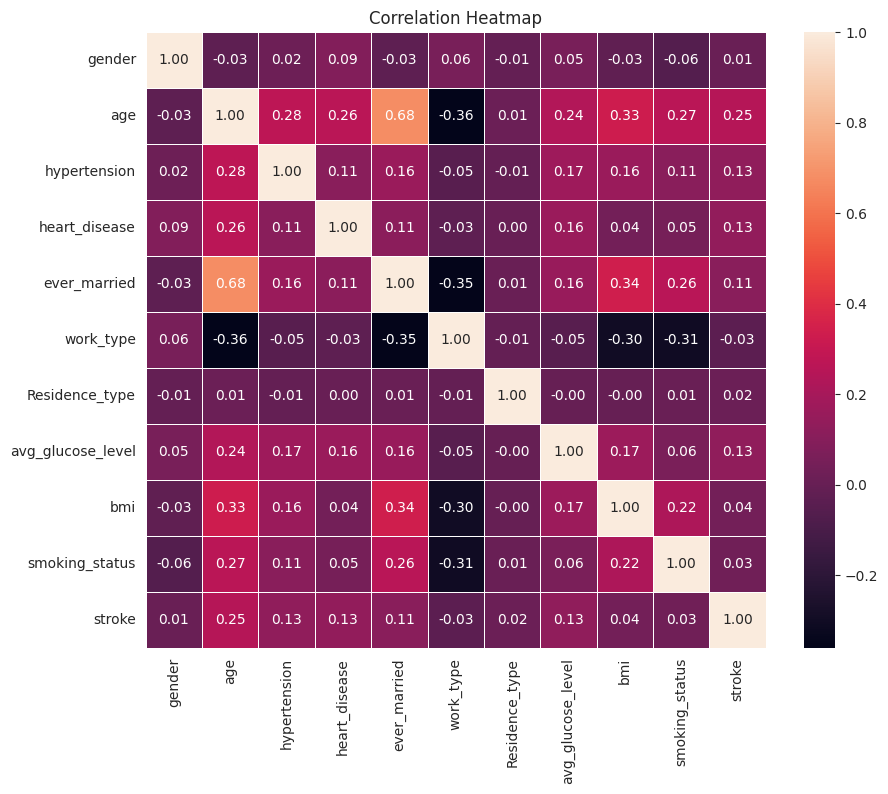

In [113]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [114]:
gender = {"Female" : [2994], "Male" : [2115], "Other" : [1]}
wt = {"Private" : [2925], "Self-employed" : [819], "Children" : [687],'Govt job': [657], 'Never worked' : [22]}
rt = {"Urban" : [2596], "Rural" : [2514]}
evermarried = {"Yes" : [3353], "No" : [1757]}
smoke = {"Never smoked " : [1892], "Formerly smoked" : [885], "Smokes" : [789],"Unknown" : [1544]}
bp =  {"Yes " : [498], "No" : [4612]}
heartdisease= {"Yes " : [276], "No" : [4834]}
stroke = {"Yes " : [249], "No" : [4861]}

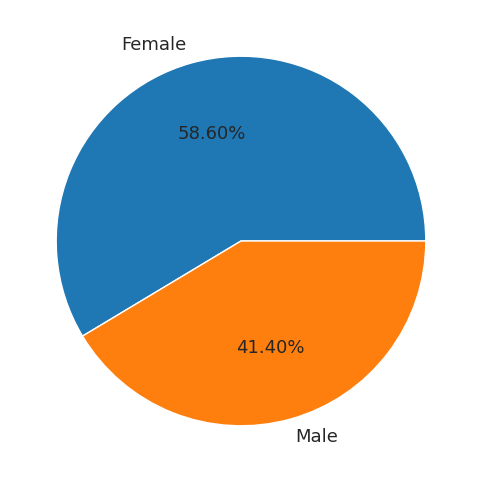

In [115]:
plt.figure(figsize = (6, 6))
temp = [2994,2115]
labels = ['Female','Male']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%',textprops=textprops)

plt.show()

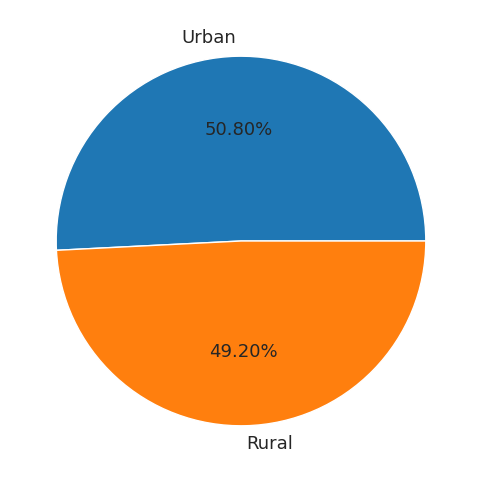

In [116]:
plt.figure(figsize = (6, 6))
temp = [2596,2514]
labels = ['Urban','Rural']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%', textprops=textprops)
plt.show()

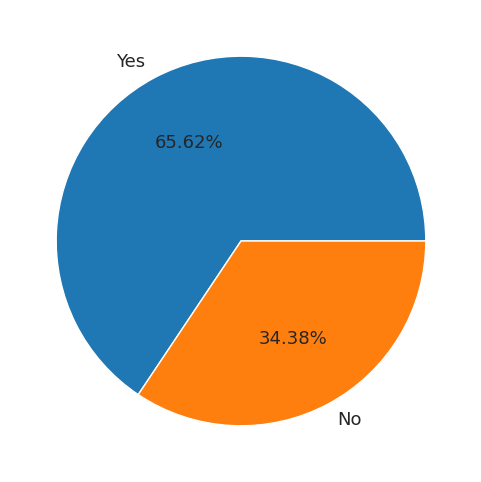

In [117]:
plt.figure(figsize = (6, 6))
temp = [3353,1757]
labels = ['Yes','No']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%',textprops=textprops)
plt.show()

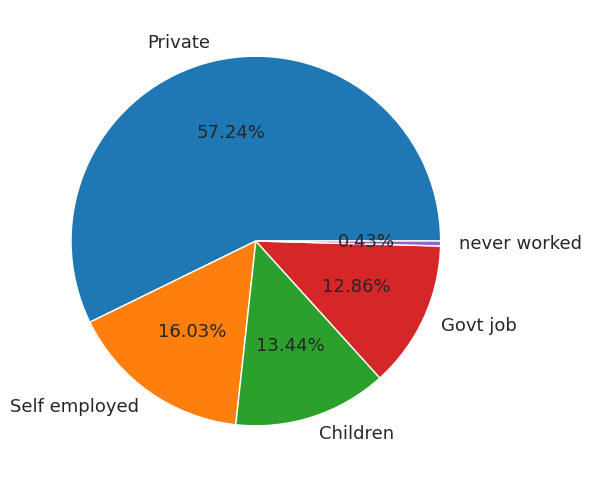

In [118]:
plt.figure(figsize=(6,6))
wt1 = [2925,819,687, 657, 22]
textprops = {"fontsize":13}
plt.pie(wt1,labels=['Private','Self employed', 'Children','Govt job','never worked'], autopct='%1.2f%%',textprops=textprops)
plt.show()

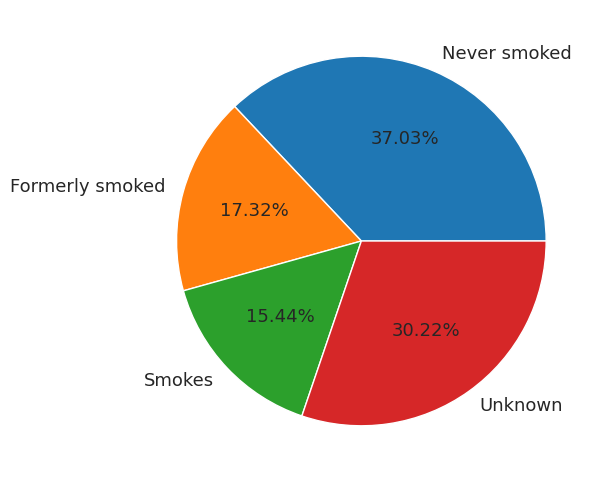

In [119]:
plt.figure(figsize = (6, 6))
temp = [1892,885,789,1544]
labels = ['Never smoked','Formerly smoked', 'Smokes','Unknown']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%',textprops=textprops)
plt.show()

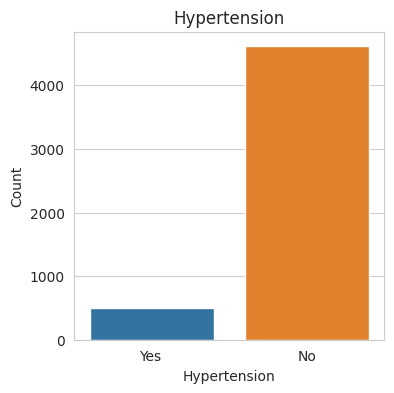

In [120]:
bp = pd.DataFrame(data= bp)
plt.figure(figsize = (4, 4))
bargraph = sns.barplot(data=bp)
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.title("Hypertension")
plt.show()

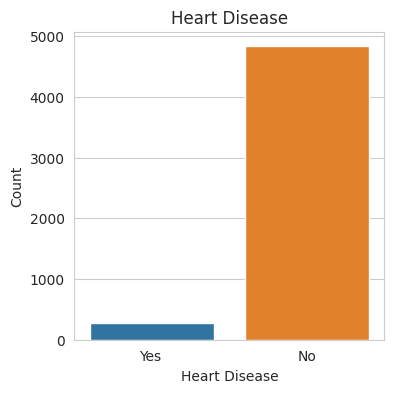

In [121]:
heartdisease = pd.DataFrame(data= heartdisease)
plt.figure(figsize = (4, 4))
bargraph = sns.barplot(data=heartdisease)
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title("Heart Disease")
plt.show()

Text(0.5, 1.0, 'Age vs Stroke')

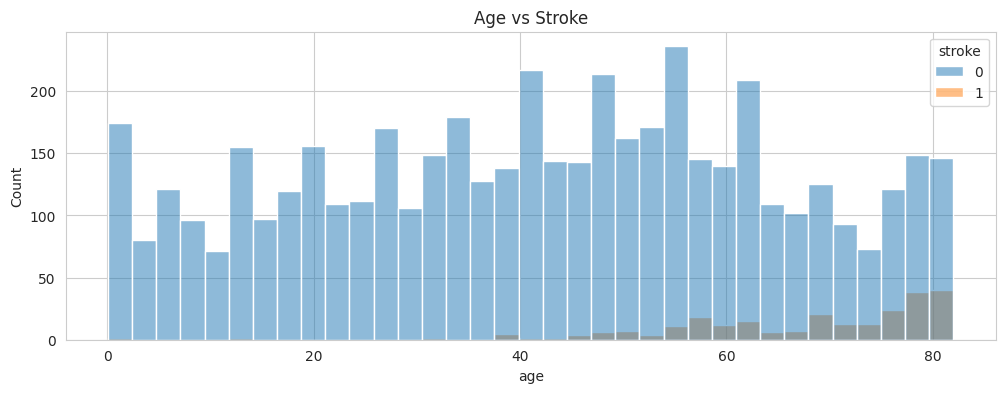

In [122]:
plt.figure(figsize=(12, 4))
pl = sns.histplot(x='age', data=data, hue='stroke', bins=35)
pl.set_title('Age vs Stroke')

Text(0.5, 1.0, 'Average Glucose Level vs Stroke')

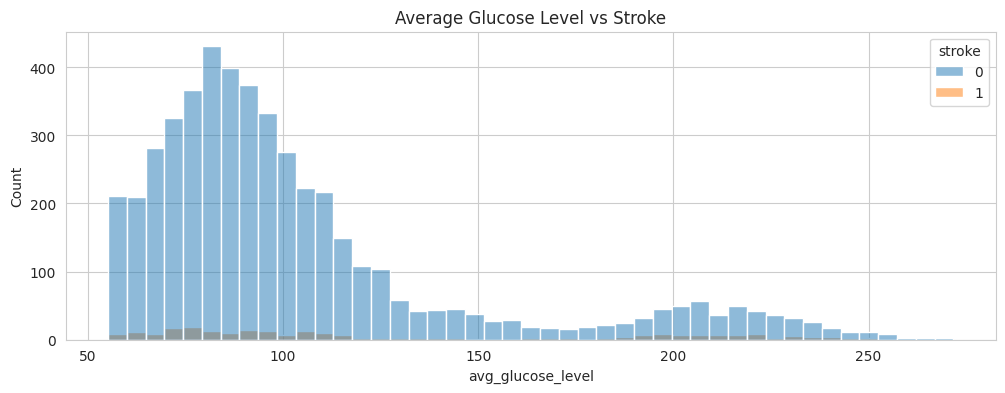

In [123]:
plt.figure(figsize=(12,4))
pl = sns.histplot(x='avg_glucose_level', data=data, hue='stroke', bins=45)
pl.set_title('Average Glucose Level vs Stroke')

Text(0.5, 1.0, 'Stroke vs BMI')

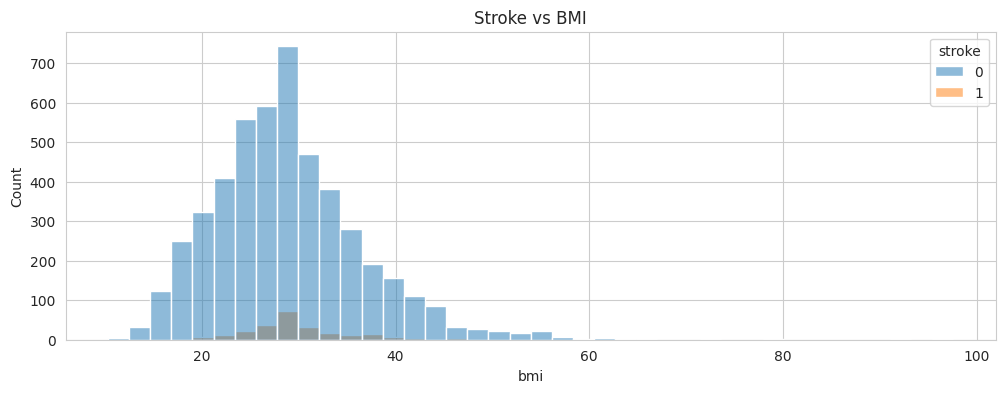

In [124]:
plt.figure(figsize=(12,4))
pl = sns.histplot(x='bmi', data=data, hue='stroke', bins=40)
pl.set_title('Stroke vs BMI')

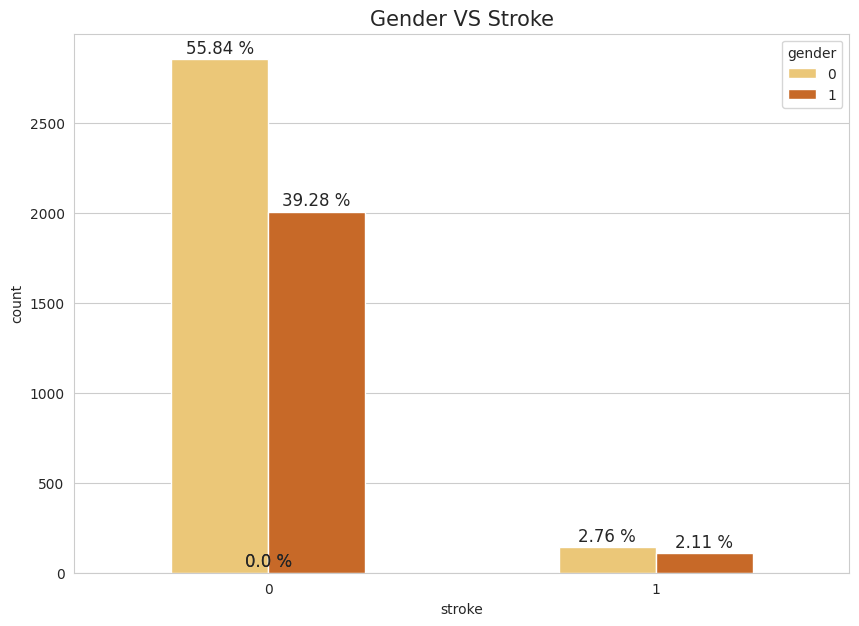

In [125]:
sns.set_style('whitegrid')
countplt, ax = plt.subplots(figsize = (10,7))
ax=sns.countplot(x=data['stroke'],hue=data['gender'],palette = 'YlOrBr', width = 0.5)
ax.set_title("Gender VS Stroke",fontsize = 15)

for j in ax.patches:
        ax.annotate(f'{round(j.get_height()/len(data)*100,2)} %', xy=(j.get_x() + j.get_width() / 2,  
            j.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

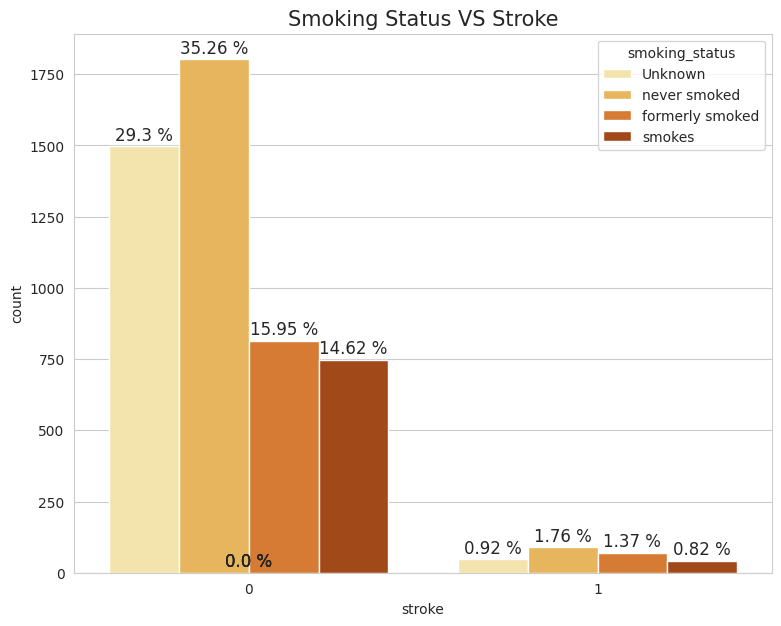

In [126]:
countplt, ax = plt.subplots(figsize = (9,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['smoking_status'],palette = 'YlOrBr',)
ax.set_title("Smoking Status VS Stroke",fontsize = 15)
for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(dataset)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,  
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

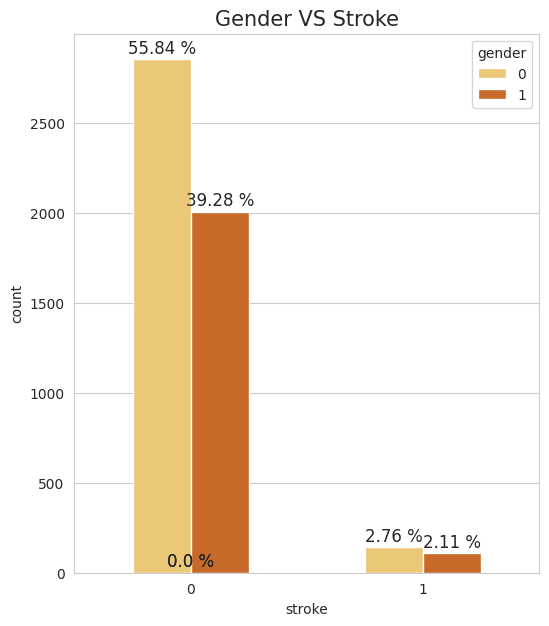

In [127]:
sns.set_style('whitegrid')
countplt, ax = plt.subplots(figsize=(6, 7))

ax = sns.countplot(x=data['stroke'], hue=data['gender'], palette='YlOrBr', width=0.5)
ax.set_title("Gender VS Stroke", fontsize=15)

total = len(data)  

for j in ax.patches:
    height = j.get_height()

    percentage = (height / total) * 100

    ax.annotate(f'{round(percentage, 2)} %', 
                xy=(j.get_x() + j.get_width() / 2, j.get_height()), 
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')

plt.show()


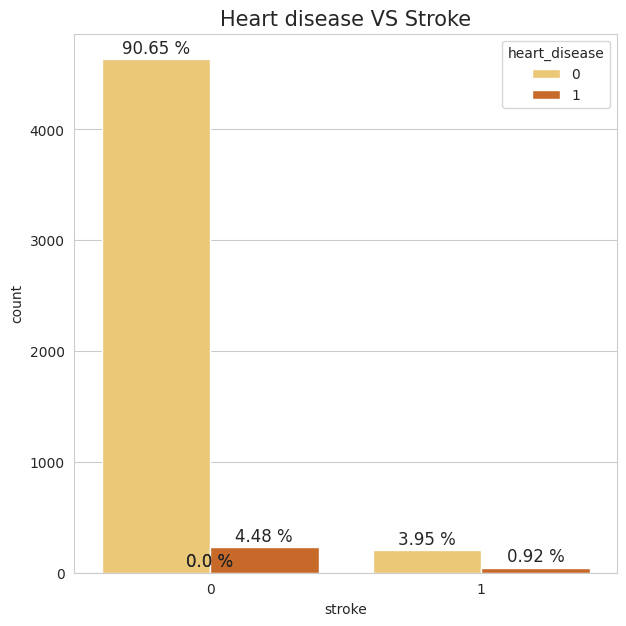

In [128]:
countplt, ax = plt.subplots(figsize = (7,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['heart_disease'],palette = 'YlOrBr')
ax.set_title("Heart disease VS Stroke",fontsize = 15)
for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(dataset)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,  
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

Text(0.5, 1.0, 'Residence Type VS Stroke')

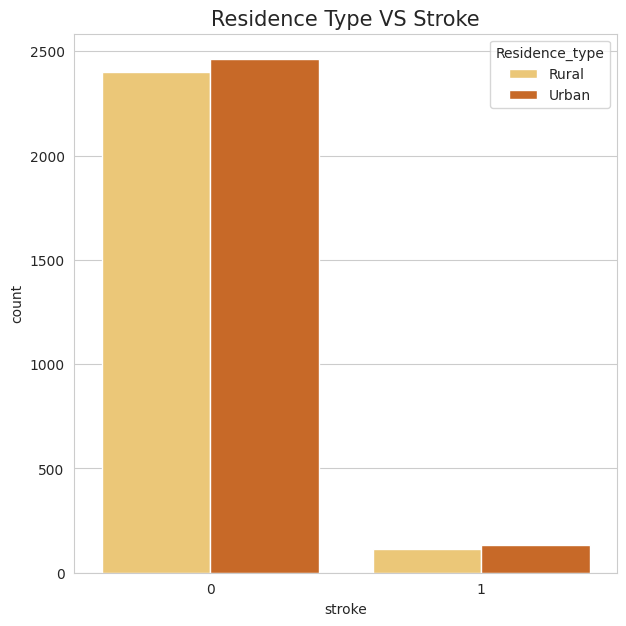

In [129]:
countplt, ax = plt.subplots(figsize = (7,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['Residence_type'],palette = 'YlOrBr')
ax.set_title("Residence Type VS Stroke",fontsize = 15)

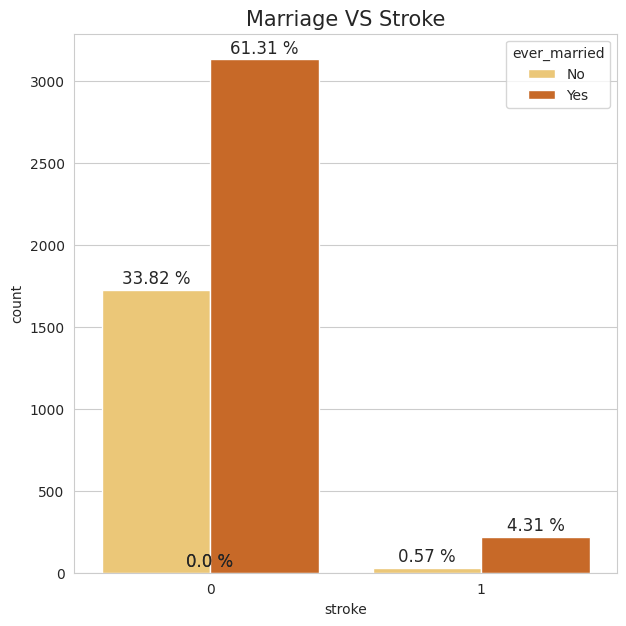

In [130]:
countplt, ax = plt.subplots(figsize = (7,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['ever_married'],palette = 'YlOrBr')
ax.set_title("Marriage VS Stroke",fontsize = 15)
for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(dataset)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,  
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

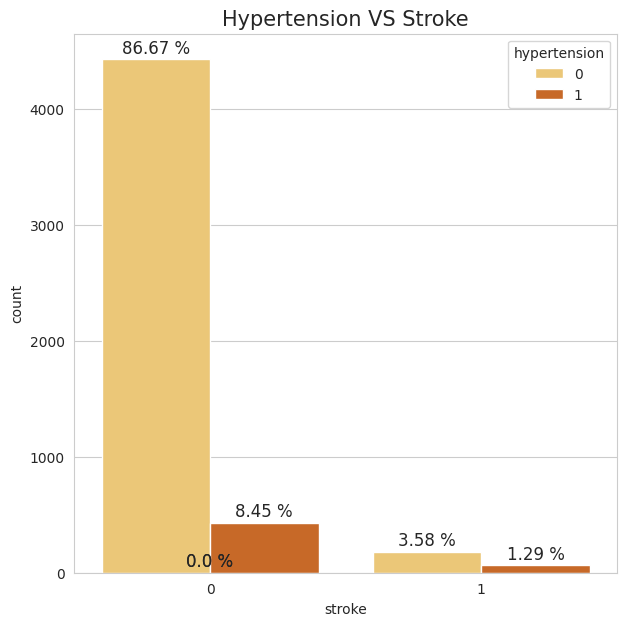

In [131]:
countplt, ax = plt.subplots(figsize = (7,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['hypertension'],palette = 'YlOrBr')
ax.set_title("Hypertension VS Stroke",fontsize = 15)

for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(dataset)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,  
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

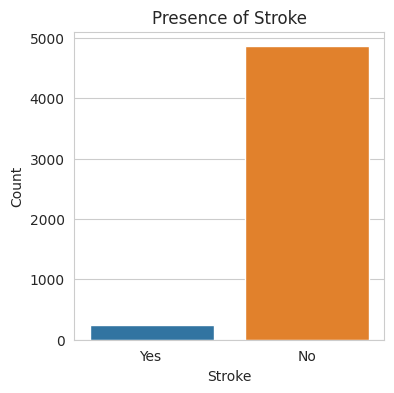

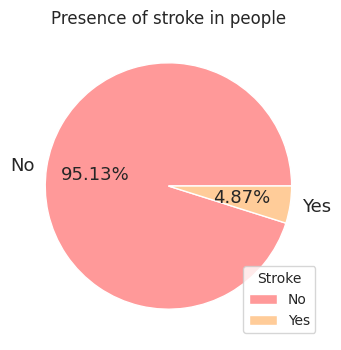

In [132]:
stroke = pd.DataFrame(stroke)
plt.figure(figsize = (4, 4))
bargraph = sns.barplot(data=stroke)
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title("Presence of Stroke")
plt.show()


plt.figure(figsize = (4, 4))
temp = [4861,249]
labels = ['No','Yes']
colors = ['#ff9999','#ffcc99'] 
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%', colors = colors,textprops = textprops )
plt.title('Presence of stroke in people')
plt.legend(title = "Stroke")
plt.show()

In [133]:
data1 = data.copy()
X = data.drop('stroke', axis = 1)
Y = data['stroke']
Y = pd.DataFrame(Y)

In [148]:
smote = SMOTE(random_state = 10)
X1, Y1 = smote.fit_resample(X, Y)

In [149]:
Y1 = pd.DataFrame(Y1)
X1 = pd.DataFrame(X1)
Y1.value_counts()

stroke
0         4860
1         4860
Name: count, dtype: int64

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y1,test_size=0.2 ,random_state = 105)
Y_train = Y_train

In [141]:
Y_train.value_counts()


stroke
1         3889
0         3887
Name: count, dtype: int64

In [144]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)
Y_pre=LR.predict(X_test)
LR_Accuracy = accuracy_score(Y_test, Y_pre)
print(LR_Accuracy*100,'%')

81.6872427983539 %


/home/hyxinh/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hyxinh/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [145]:
CM = confusion_matrix(Y_test, Y_pre)
print(CM)

[[783 190]
 [166 805]]


In [146]:
print(classification_report(Y_test, Y_pre))
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       973
           1       0.81      0.83      0.82       971

    accuracy                           0.82      1944
   macro avg       0.82      0.82      0.82      1944
weighted avg       0.82      0.82      0.82      1944

specificity = 0.8047276464542652


In [150]:
y_score_LR = LR.predict_proba(X_test)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(Y_test, y_score_LR)

In [151]:
print('roc_auc_score for Logistic Regression: ', roc_auc_score(Y_test, y_score_LR))

roc_auc_score for Logistic Regression:  0.8949896431244
